In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import os
from urllib.request import urlretrieve

In [2]:
img_urls = {}
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'}
for num in range(1,3):
    if num == 1:
        url = 'http://www.shuaia.net/dongman/'
    else:
        url = 'http://www.shuaia.net/dongman/index_%d.html'%num
    req = requests.get(url=url,headers=headers)
    req.encoding = 'utf-8'
    bf = BeautifulSoup(req.text)
    for each in bf.find_all('a',class_='item-img'):
        if each.img.get('alt') and each.get('href'):
            img_urls[each.img.get('alt')] = each.get('href')

In [4]:
for name,url in img_urls.items():
    img_html = requests.get(url=url)
    img_bf = BeautifulSoup(img_html.text)
    for each in img_bf.find_all('div',class_='wr-single-content-list'):
        img_url = 'http://www.shuaia.net' + each.img.get('src')
        img = requests.get(img_url)
        with open('./images/%s.jpg'%name,'wb') as f:
            f.write(img.content)
    time.sleep(1)

In [5]:
d = plt.imread('./images/美男许墨.jpg')

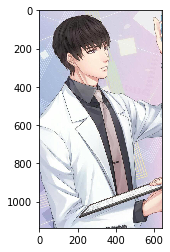

In [6]:
plt.imshow(d)